Separating Color Channels

In [3]:
import cv2

roseimg = cv2.imread("rose.jpg")

redChannel = roseimg[:,:,0]
cv2.imwrite("redChannel.jpg", redChannel)

greenChannel = roseimg[:,:,1]
cv2.imwrite("greenChannel.jpg", greenChannel)

blueChannel = roseimg[:,:,2]
cv2.imwrite("blueChannel.jpg", blueChannel)

True

Operations on GrayScale

In [4]:
import cv2

roseimg = cv2.imread("rose.jpg")
grayrose = cv2.cvtColor(roseimg, cv2.COLOR_BGR2GRAY)
cv2.imwrite("grayrose.jpg", grayrose)

True

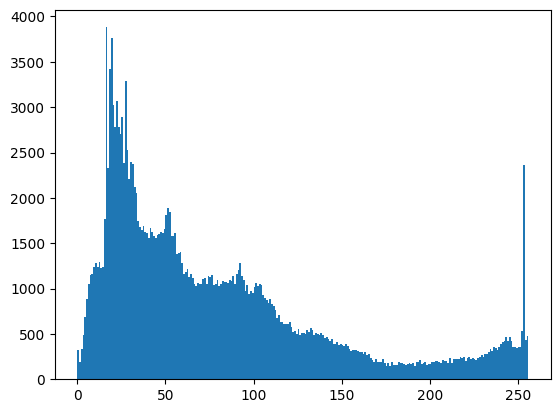

In [31]:
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('rose.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256])
plt.show()

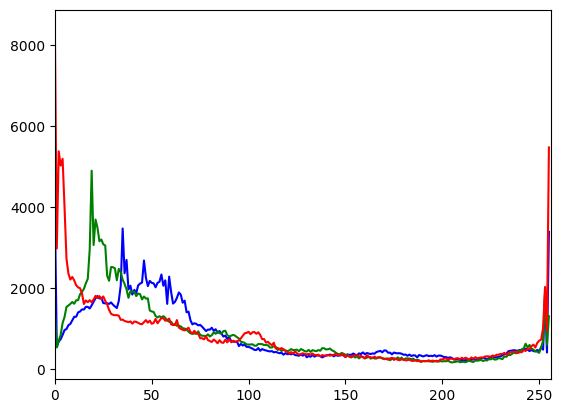

In [28]:
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('rose.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Report:
As can be seen, in most parts, the RED chennel contrast ranks first.

Equalization of GrayScale Image

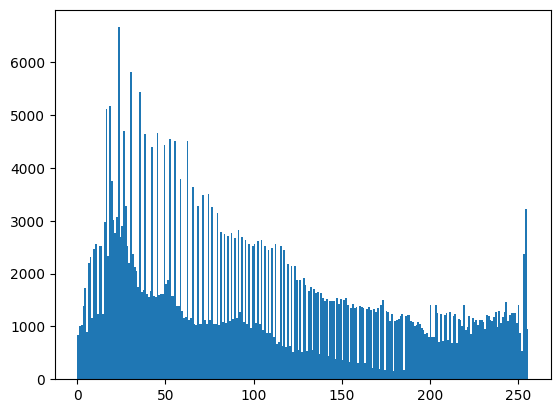

In [35]:
import cv2 as cv

image = cv.imread('rose.jpg')

equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

cv.imwrite("equalized.jpg", res)

plt.hist(res.ravel(),256,[0,256])
plt.show()

Report:
After equalization, the whole image's contrast has rised and thus, the seeability and transparency has been improved

Fourier Transform of the Image

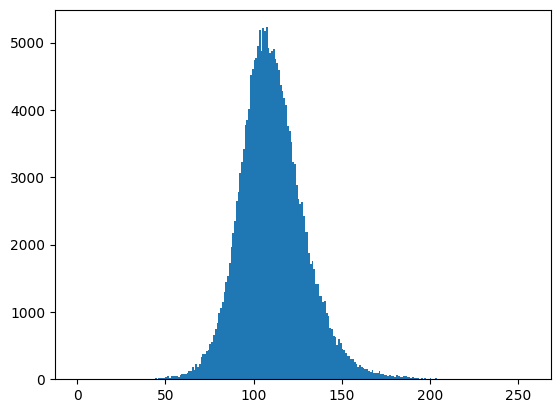

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
image = cv2.imread("rose.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

fourier_shift = np.fft.fftshift(fourier)
 
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

cv.imwrite("fourier.jpg", magnitude)
plt.hist(magnitude.ravel(),256,[0,256])
plt.show()
 

Report:
After the fourier transform, the signals have got a Guassian distribution (somehow!), which means, the closet the pixels are to the edges, the less their brightness is and it actually starts fading around the edges.